# 과제 : K-means와 DBSCAN 비교


아래 데이터셋을 활용하여 클러스터링을 하려고 합니다.
코드의 빈칸을 채우시고, 주관식 문제에 답해주세요.

## 데이터셋 불러오기 및 시각화

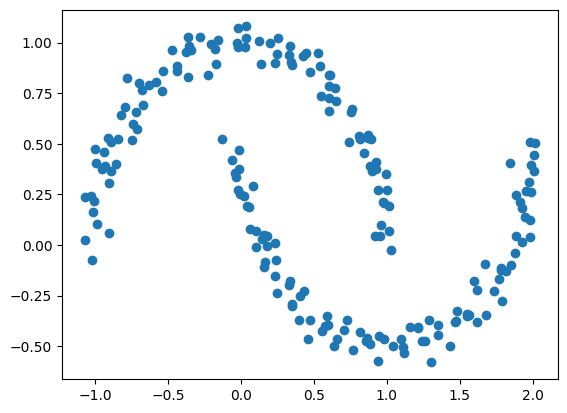

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN

x, y = make_moons(n_samples = 200, shuffle = True, noise = 0.05, random_state = 0)
plt.scatter(x[:, 0], x[:, 1])
plt.show()

km = KMeans(n_clusters = 2, random_state = 0)
pred1 = km.fit_predict(x)

## K-means 클러스터링

### Elbow method

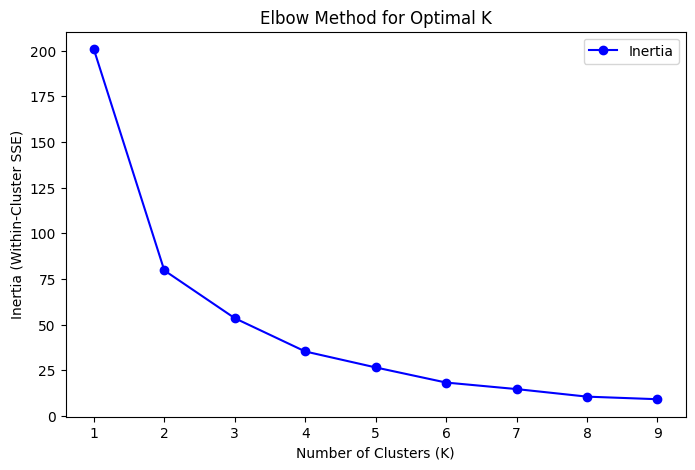

In [2]:
# 엘보우 메소드 시각화
inertia_values = []
silhouette_values = []
K_range = range(1, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(x)
    inertia_values.append(km.inertia_)

fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.plot(K_range, inertia_values, marker='o', linestyle='-', color='blue', label="Inertia")
ax1.set_xlabel("Number of Clusters (K)")
ax1.set_ylabel("Inertia (Within-Cluster SSE)")
ax1.set_title("Elbow Method for Optimal K")
ax1.legend()
plt.show()

### 문제 1
**엘보우 메소드를 바탕으로, 최적의 K값을 설정하여 코드의 빈칸을 채운 후, 판단 근거를 서술하세요.**

엘보우 기법이란 SSE의 감소율이 급격하게 줄어드는 지점을 찾는 방법을 말한다. 위의 시각화를 확인해보면 K값이 2일때 급격하게 그래프가 꺾이는 지점임을 알 수 있다. 따라서 최적의 K값은 2이다.

In [7]:
# 3️⃣ 최적의 K값 선택 (엘보우 지점)
optimal_k = 2  # 엘보우 메소드에서 꺾이는 지점을 선택

### 결과

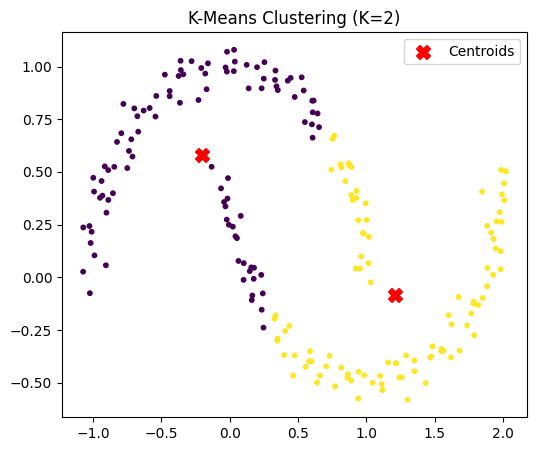

In [8]:
# K-Means 클러스터링 실행
km = KMeans(n_clusters=optimal_k, random_state=0)
pred_kmeans = km.fit_predict(x)

# 시각화
plt.figure(figsize=(6, 5))
plt.scatter(x[:, 0], x[:, 1], c=pred_kmeans, cmap='viridis', s=10)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='red', marker='X', s=100, label="Centroids")
plt.title(f"K-Means Clustering (K={optimal_k})")
plt.legend()
plt.show()


## DBSACN

### 문제 2
**eps와 min_samlpes의 개념을 이해한 후, 이 둘을 조절하여 실행해보며 아래 사진과 같은 군집을 형성하세요.**

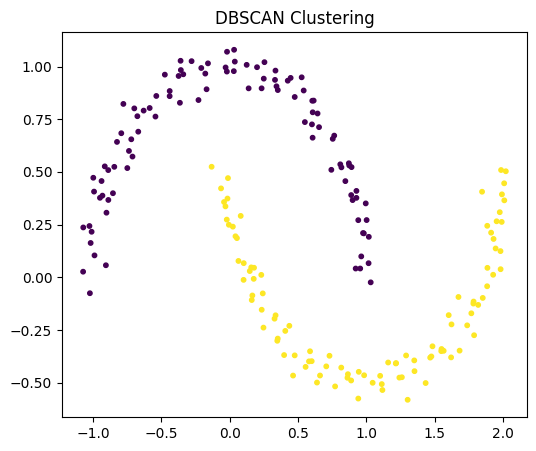

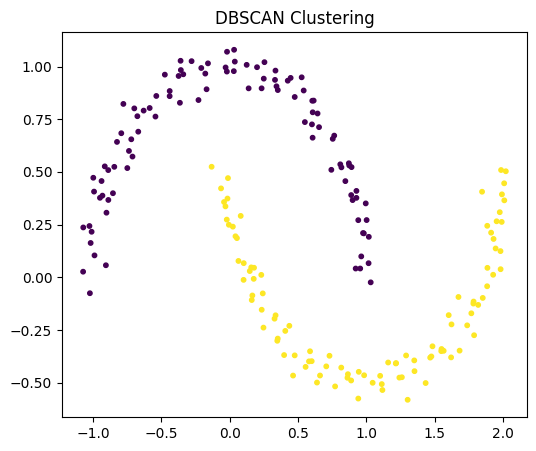

In [9]:
# DBSCAN 클러스터링 실행
dbscan = DBSCAN(eps= 0.2, min_samples= 5)
pred_dbscan = dbscan.fit_predict(x)

# 시각화
plt.figure(figsize=(6, 5))
plt.scatter(x[:, 0], x[:, 1], c=pred_dbscan, cmap='viridis', s=10)
plt.title("DBSCAN Clustering")
plt.show()


### 문제 3
**eps와 min_samples가 너무 크거나 작을 때, 왜 상식적인 군집화가 이루어지지 않았을까요?**

* eps는 cluster를 구성하는 최소의 거리이다.
eps가 너무 크면 대부분의 데이터가 한 개의 군집으로 합쳐져 언더피팅이 발생하고, eps가 너무 작으면 대부분의 데이터가 노이즈로 분류된다.

* min_samples는 cluster를 구성 시, 필요한 최소 데이터 포인터 수이다. min_samples가 너무 크면 너무 적은 수의 군집이 형성되거나 대부분이 노이즈로 처리되고, min_samples가 너무 작으면 작은 군집이 많이 생성되어 오버피팅이 발생한다.

### 문제 4
**K-means의 결과와, DBSCAN의 결과가 다른 이유를 특징을 포함하여 서술하세요.**


K-means는 원형(구형) 클러스터에 적합하고, DBSCAN은 임의의 모양 클러스터도 탐색 가능하다는 차이가 있다. 따라서 다음 예시인 반달 모양 같은 비선형 데이터에서는 K-means 기법이 부적절할 수 있다. DBSCAN은 밀도가 높은 영역을 중심으로 군집을 형성하며 군집에 속하지 않는 이상치도 자동으로 탐지 가능하므로 해당 예시에 더 적합한 군집화 방법이다.